# 线性回归实战项目

* 数据下载 [点击这里](https://www.kaggle.com/jsrojas/ip-network-traffic-flows-labeled-with-87-apps)

In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

## Step.1 导入数据

In [2]:
path = 'netflow.csv'
pd_data = pd.read_csv(path)
pd_data.head()

,Unnamed: 0,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY


## Step.2 数据处理

In [3]:
pd_data.keys()

Index(['Unnamed: 0', 'Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Le

In [4]:
pd_data.shape

(100000, 88)

In [104]:
Ori_Datas = pd_data.loc[:,['Protocol', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'ACK.Flag.Count',
       'URG.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio',
       'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size',
       'Fwd.Header.Length.1', 'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk',
       'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk',
       'Bwd.Avg.Bulk.Rate', 'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes',
       'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min','Flow.Packets.s']]

In [105]:
Ori_Datas.shape

(100000, 78)

In [126]:
Datas = Ori_Datas.to_numpy()

In [107]:
Datas = Datas[0:9000]

In [129]:
np.save('data.npy', Datas)

## Checkpoint

* 保存数据为 project_1.npy

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

np.set_printoptions(suppress=True)

Datas = np.load('data.npy')
Datas.shape

(100000, 78)

## Step.3 数据集划分

In [13]:
train_x = Datas[:60,0:-1]
train_y = Datas[:60,-1]
test_x = Datas[60:90,:-1]
test_y = Datas[60:90,-1]

## Step.4 建立模型并完成训练

In [14]:
model = linear_model.LinearRegression()
model.fit(train_x, train_y)
model.score(test_x, test_y)

1.0

## Step.5 测试与可视化

In [15]:
model.score(test_x, test_y)

1.0

In [5]:
predict = model.predict(test_x)
predict.shape

(100,)

In [6]:
test_x[0]

array([    6.        ,   349.        ,     1.        ,     1.        ,
           6.        ,     6.        ,     6.        ,     6.        ,
           6.        ,     0.        ,     6.        ,     6.        ,
           6.        ,     0.        , 34383.95415473,   349.        ,
           0.        ,   349.        ,   349.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,    20.        ,    20.        ,  2865.32951289,
        2865.32951289,     6.        ,     6.        ,     6.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     1.        ,     1.        ,
           0.        ,     0.        ,     1.        ,     9.        ,
           6.        ,     6.        ,    20.        ,     0.        ,
      

In [7]:
predict[0]

5730.659025790082

In [8]:
test_y[0]

5730.65902578797

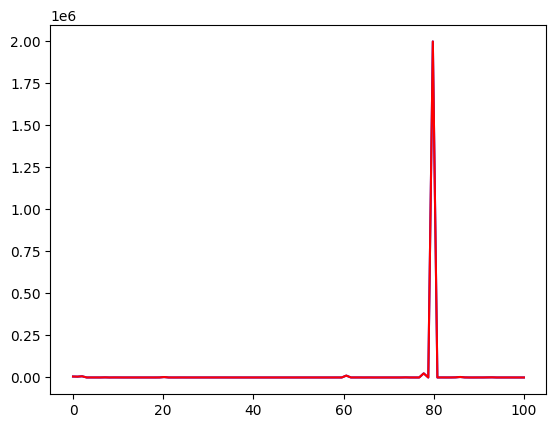

In [9]:
plt_x = np.linspace(0,100,100)
plt.plot(plt_x,test_y[:100],'b')
plt.plot(plt_x,predict[:100],'r')
plt.show()

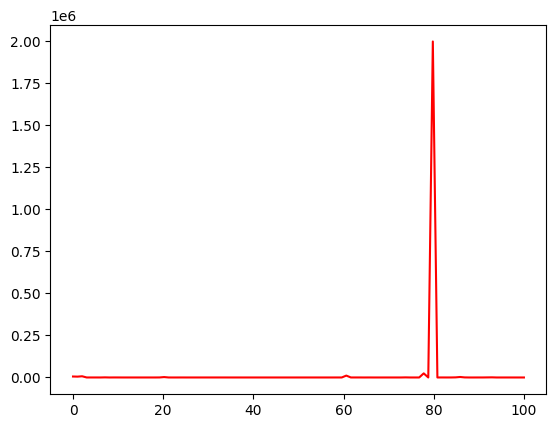

In [10]:
plt.plot(plt_x, predict[:100],'r')